In [1]:
from datetime import datetime, timedelta
import json
from math import ceil
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from models.qp.qpercent import QPercent
from util.batcher import Batcher
from util.stock_loader import Loader

In [2]:
!ls ../models/qp

__pycache__ data        qpercent.py


In [3]:
SD = 0.05 * (0.8 ** 1) # -4 ... 10 
print('SD:', SD)

SD: 0.04000000000000001


In [4]:
DATA = '../models/qp/data'
SYMBOLS = [
    'ABMD', 'ABNB', 'ANET', 'ATVI', 'AXON', 'AYX', 'BILI', 'BYND', 'COUR', 'CPNG', 'DDOG', 
    'DOCU', 'EDIT', 'ETSY', 'FSLY', 'FUV', 'GH', 'GMED', 'INTG', 'ISRG', 'JD', 'LULU', 
    'LUV', 'MDB', 'MELI', 'MNST', 'MTCH', 'NVCR', 'OKTA', 'PANW', 'PINS', 'PTON', 'QDEL', 
    'RDFN', 'RGEN', 'ROKU', 'SE', 'SHOP', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 
    'TWTR', 'VEEV', 'ZEN', 'ZG', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

49

In [5]:
N_YEARS = 50
N_CUTS = 10
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = datetime.now().date()
START = '1978-07-26' #str(TODAY - timedelta(N_DAYS))
START, TODAY

('1978-07-26', datetime.date(2021, 6, 28))

In [6]:
batcher = Batcher(SYMBOLS, INDICES)
batch = batcher.get_batch_from_weekday(TODAY.weekday())
batch

['ABMD', 'ABNB', 'ANET', 'ATVI', 'AXON', 'AYX', 'BILI', '^GSPC']

In [7]:
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download()

[*********************100%***********************]  8 of 8 completed
Generating derived columns...
   ...ABMD
   ...ABNB
   ...ANET
   ...ATVI
   ...AXON
   ...AYX
   ...BILI
   ...^GSPC


In [8]:
def get_stock_data(stock, data):
    sub = data.loc[:,  [x for x in list(data) if x[1] == stock or x[0] == 'Date']]
    first_value = sub.Value[stock][sub.Value[stock].notna()].index[0]
    sub = sub.loc[first_value:, :]
    sub.index = range(sub.shape[0])
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    return sub

In [9]:
def str_to_tuple(s):
    s = s[1:-1]
    return tuple([float(x) for x in s.split(', ')])

str_to_tuple('(0.123, 0.456)')

(0.123, 0.456)

In [10]:
def read_best_params(stock):
    try:
        with open(f'{DATA}/{stock}_best.json', 'r') as f:
            params = json.load(f)
        for k in params:
            params[k]['q_params'] = {str_to_tuple(k): v for k, v in params[k]['q_params'].items()}
        best_returns = {k: params[k]['best_return'] for k in params}
        print('Loaded current best.')
        return params, best_returns
    except FileNotFoundError:
        print('No saved data. Initialized as None')
        return None, None
    except:
        print(f'Unexpected error getting {stock} data.  Initialized as None.')

In [11]:
def get_best_param_set(qp):
    best_param_set = qp.best_param_set
    for method in best_param_set:
        best_param_set[method]['best_return'] = qp.best_returns[method]
        # stringify tuple keys:
        best_param_set[method]['q_params'] = {str(k): v for k, v in best_param_set[method]['q_params'].items()}
    return best_param_set

In [12]:
def save_best_param_set(best_param_set, stock):
    print(f'Saving {stock} params...')
    with open(f'{DATA}/{stock}_best.json', 'w') as f:
        json.dump(best_param_set, f)

In [13]:
if TODAY.weekday() == 0:
    !say update standard deviation




----------------------------------------------------------------------
                                 ABMD
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 80.39742155997983
Refitting current best...
Current best ma returns: 138.60109878094403
Fraction Invested: 0.9999967302590492
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 139.49404213579578
Invested: 0.9999967302590492
New best: 141.40935814498715
Invested: 0.9999967302590492
New best: 141.40962404318915
Invested: 0.9999967302590492
New best: 141.44023761906925
Invested: 0.9999967302590492
New best: 142.47087198697784
Invested: 0.9999967302590492
New best: 142.47936494262805
Invested: 0.9999967302590492
New best: 142.48567996679117
Invested: 0.9999967302590492
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing ret

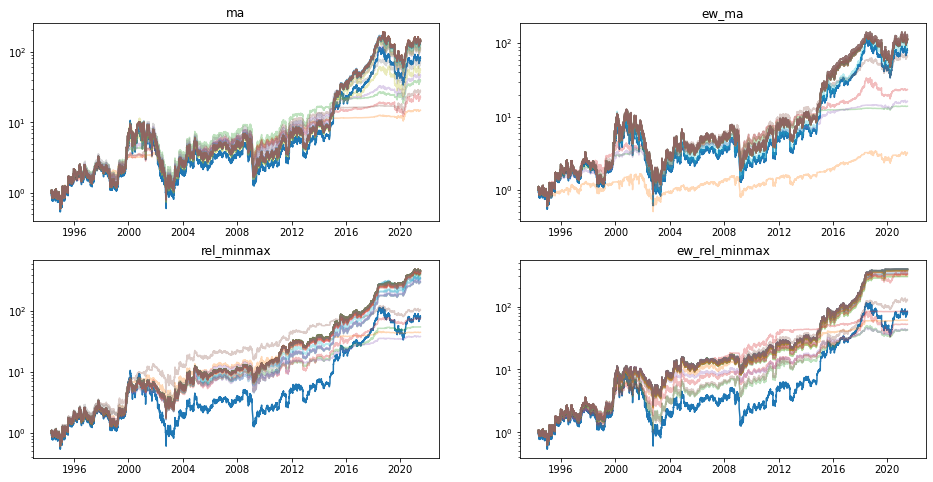

Saving ABMD params...



----------------------------------------------------------------------
                                 ABNB
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 0.8296563372104531
Refitting current best...
Current best ma returns: 0.9298744773200491
Fraction Invested: 0.4687466912778826
Beginning random search...
New best: 0.9395309496613731
Invested: 0.27144536397572283
Round: 5
Beginning adjusted search...
New best: 0.9397096966360285
Invested: 0.27144536397572283
New best: 0.9398503097653239
Invested: 0.27144536397572283
New best: 0.9398745348102172
Invested: 0.27144536397572283
New best: 0.9431930197898337
Invested: 0.27144536397572283
New best: 0.9442739112105963
Invested: 0.27144536397572283
New best: 0.9478377155654942
Invested: 0.27144536397572283
New best: 0.9495122758098216
Invested: 0.27144536397572283
New best: 0.95

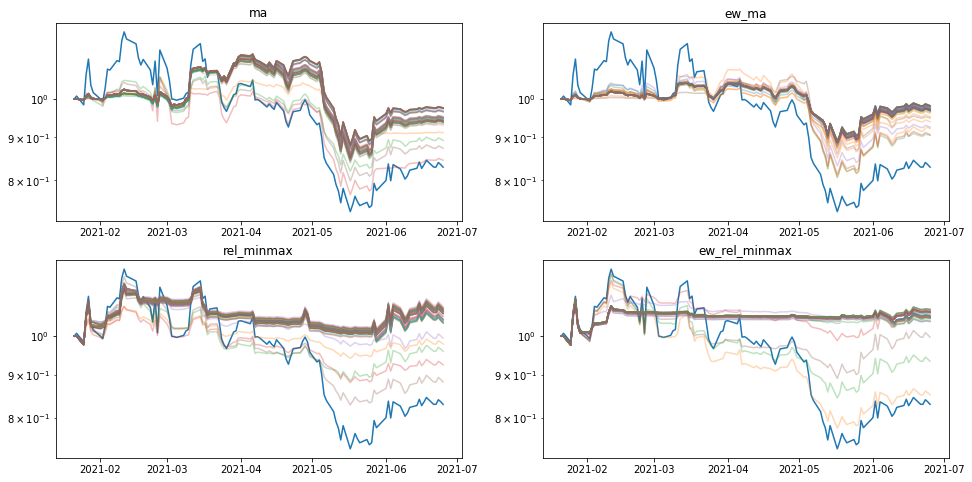

Saving ABNB params...



----------------------------------------------------------------------
                                 ANET
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 5.85169615980167
Refitting current best...
Current best ma returns: 6.7043427071421835
Fraction Invested: 0.9977219408304996
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 6.7257213925755295
Invested: 0.9977219408304996
New best: 6.726290273889534
Invested: 0.9977219408304996
New best: 6.7263024061499275
Invested: 0.997746586601566
New best: 6.7717301273784845
Invested: 0.997746586601566
New best: 6.820920415482307
Invested: 0.997746586601566
New best: 6.820934533318474
Invested: 0.997746586601566
New best: 6.8209354999269145
Invested: 0.997746586601566
New best: 6.820946733770446
Invested: 0.997746586601566
New best: 6.821384080735546
Invest

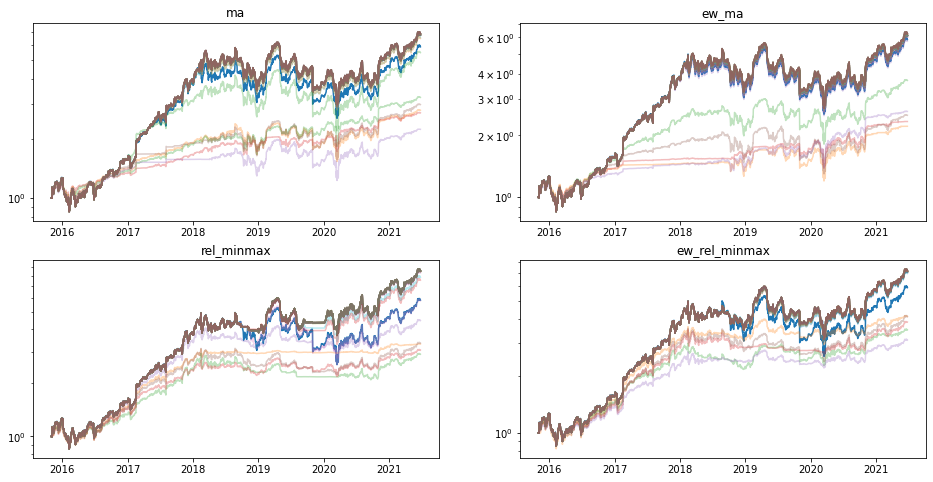

Saving ANET params...



----------------------------------------------------------------------
                                 ATVI
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 114.15026750201218
Refitting current best...
Current best ma returns: 146.0714623127285
Fraction Invested: 0.9954664775210671
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 146.07193587532083
Invested: 0.9954664775210671
New best: 146.41230279454308
Invested: 0.9954664775210671
New best: 146.42821025730748
Invested: 0.9954664775210671
New best: 146.4292371728176
Invested: 0.9954664775210671
New best: 146.46488614020987
Invested: 0.9954664775210671



Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 114.15026750201218
Refitting current best...
Current best ew_ma returns: 207.93647890019759
Fracti

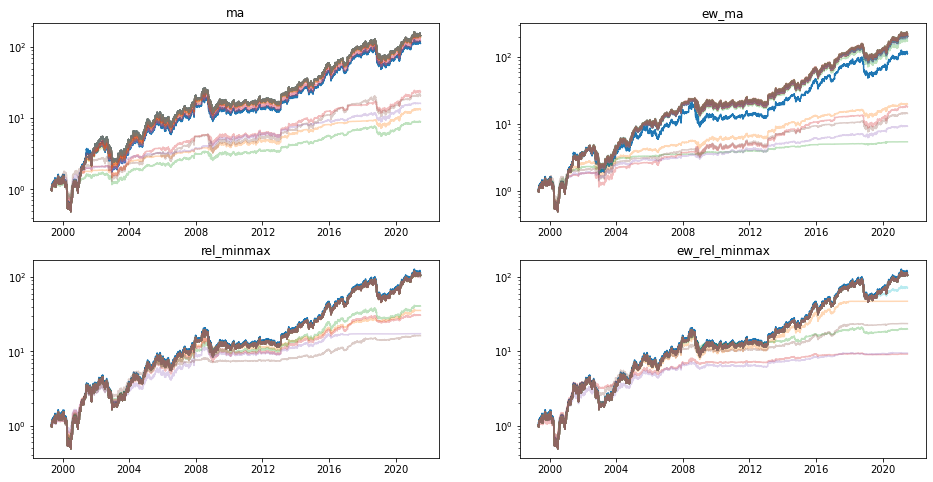

Saving ATVI params...



----------------------------------------------------------------------
                                 AXON
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 16.539865052791967
Refitting current best...
Current best ma returns: 24.074155842192965
Fraction Invested: 0.7435033856504045
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 24.227886660933617
Invested: 0.7435033856504045
New best: 25.34513470311169
Invested: 0.7435033856504045
New best: 25.345220383333558
Invested: 0.7435033856504045
New best: 25.347653252510973
Invested: 0.7435033856504045
New best: 26.009869424852184
Invested: 0.7435033856504045
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 16.539865052791967
Refitting current best...
Current best ew_ma returns: 24.123319257151

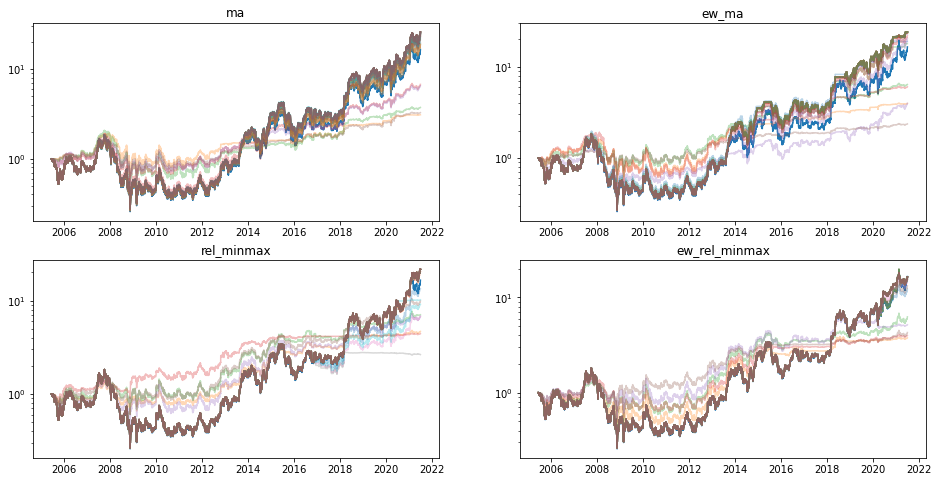

Saving AXON params...



----------------------------------------------------------------------
                                 AYX
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 3.0504948922295942
Refitting current best...
Current best ma returns: 10.046408661692343
Fraction Invested: 0.9994504753780634
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 10.169634460540912
Invested: 0.9994504753780634
New best: 10.181394071202961
Invested: 0.9994504753780634
New best: 10.183039366269954
Invested: 0.9996875083936301
New best: 10.193837391009241
Invested: 0.9996875083936301
New best: 10.267822845876552
Invested: 0.9996875083936301
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 3.0504948922295942
Refitting current best...
Current best ew_ma returns: 6.0666590192376

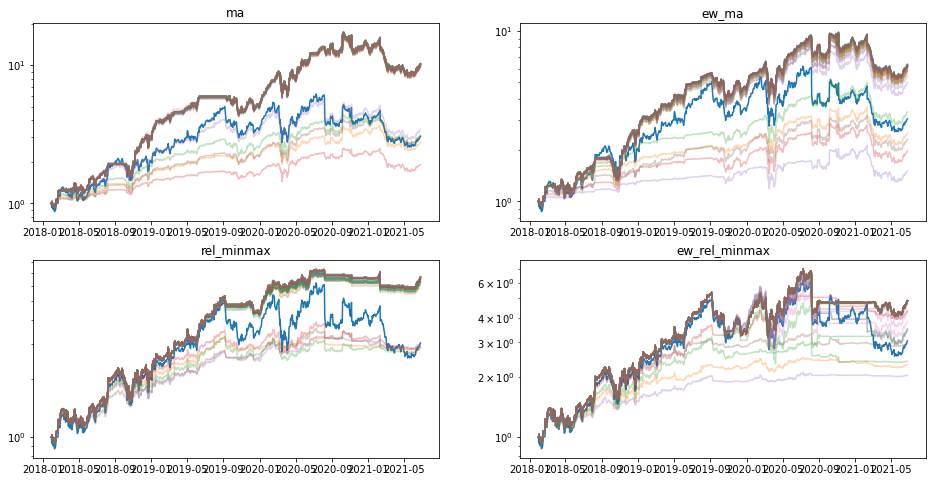

Saving AYX params...



----------------------------------------------------------------------
                                 BILI
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 8.5827584102236
Refitting current best...
Current best ma returns: 10.51374695026246
Fraction Invested: 0.995550341145779
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 10.513917929211578
Invested: 0.995550341145779
New best: 10.51412625678816
Invested: 0.995550341145779
New best: 10.514219622691968
Invested: 0.995550341145779
New best: 10.514231476251677
Invested: 0.995550341145779
New best: 10.519721509442268
Invested: 0.995550341145779
New best: 10.522260706333814
Invested: 0.995550341145779
New best: 10.52227826654656
Invested: 0.995550341145779
New best: 10.522288414137163
Invested: 0.995550341145779
New best: 10.600803481457874
Invested:

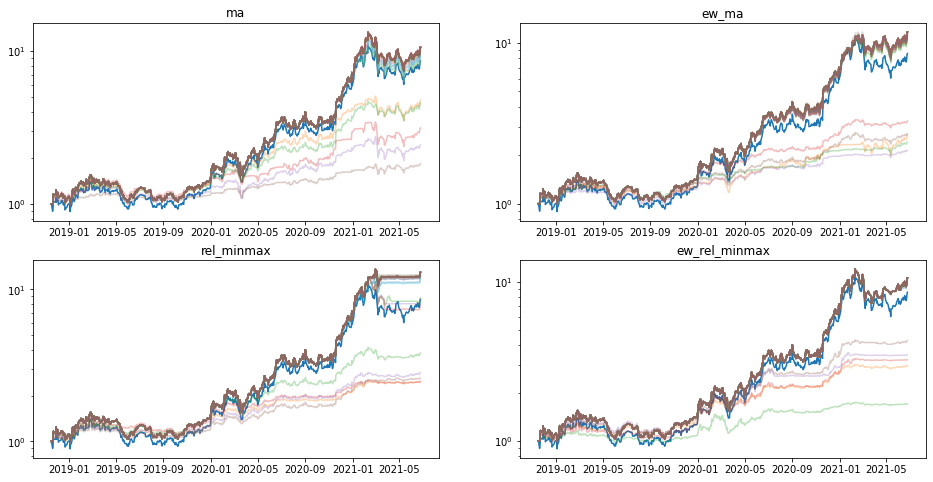

Saving BILI params...



----------------------------------------------------------------------
                                 ^GSPC
----------------------------------------------------------------------
Loaded current best.


Beginning ma method...
--------------------------------------------------
Do nothing returns: 14.994221660094736
Refitting current best...
Current best ma returns: 16.297290935745707
Fraction Invested: 0.9941446043093198
Beginning random search...
Round: 5
Beginning adjusted search...
New best: 16.30025064619698
Invested: 0.9941446043093198
New best: 16.300254249033884
Invested: 0.9941446043093198
New best: 16.300255103268654
Invested: 0.9941446043093198
New best: 16.300603004166355
Invested: 0.9941446043093198
Round: 50


Beginning ew_ma method...
--------------------------------------------------
Do nothing returns: 14.994221660094736
Refitting current best...
Current best ew_ma returns: 18.322904193951107
Fraction Invested: 0.9927877123806145
Beginning rando

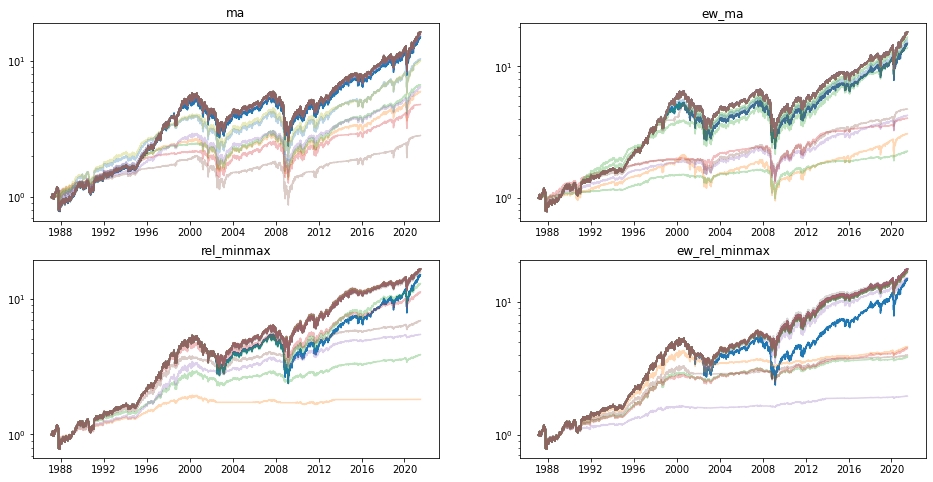

Saving ^GSPC params...


In [14]:
N_RAND = 5
N_ADJ = 50

for stock in batch:
    print('\n\n')
    print('-' * 70)
    print(' ' * 32, stock)
    print('-' * 70)
    best_params, best_returns = read_best_params(stock)
    stock_data = get_stock_data(stock, data)
    qp = QPercent(stock_data, N_CUTS, best_param_set=best_params, best_returns=best_returns, sd=SD)
    qp.run_sims(N_RAND, N_ADJ)
    best = get_best_param_set(qp)
    save_best_param_set(best, stock)

In [19]:
def get_summary(stocks):
    for stock in stocks:
        try:
            with open(f'{DATA}/{stock}_best.json', 'r') as f:
                best = json.load(f)
            best_method = None
            best_return = 0
            best_pct = None
            for key in best:
                ret = best[key]['best_return']
                if ret > best_return:
                    best_return = ret
                    best_method = key
                    best_pct = best[key]['pct']
            print(f'\n{stock}:\n  Best Return: {best_return} ({best_method})\n  {100 * best_pct:.2f}% in')
        except FileNotFoundError:
            continue

In [20]:
get_summary(SYMBOLS + INDICES)


ABMD:
  Best Return: 464.20851017152904 (rel_minmax)
  43.18% in

ABNB:
  Best Return: 1.084508663599577 (rel_minmax)
  45.13% in

ANET:
  Best Return: 8.561156290812194 (rel_minmax)
  99.38% in

ATVI:
  Best Return: 225.6217350040542 (ew_ma)
  99.86% in

AXON:
  Best Return: 26.009869424852184 (ma)
  74.35% in

AYX:
  Best Return: 10.267822845876552 (ma)
  99.97% in

BILI:
  Best Return: 12.959506419505866 (rel_minmax)
  99.30% in

BYND:
  Best Return: 5.2522743350136984 (rel_minmax)
  81.27% in

COUR:
  Best Return: 1.1552896256803478 (rel_minmax)
  0.85% in

CPNG:
  Best Return: 1.0990717511144064 (ew_rel_minmax)
  16.29% in

DDOG:
  Best Return: 3.084209426432002 (rel_minmax)
  27.65% in

DOCU:
  Best Return: 8.600881937719935 (ew_ma)
  99.78% in

EDIT:
  Best Return: 7.6375053060643845 (ew_rel_minmax)
  0.11% in

ETSY:
  Best Return: 27.935713889485747 (ew_rel_minmax)
  0.74% in

FSLY:
  Best Return: 6.552982415936774 (rel_minmax)
  93.14% in

FUV:
  Best Return: 10.7635003203983

In [16]:
!say qp is dunzo